In [40]:
f = open("/home/argo/IMPISH/Data/xray_beam/cryst-out30.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

        Energy    y
0      30.0000 -1.0
1      30.0000 -1.0
2      30.0000 -1.0
3      29.8697 -1.0
4      30.0000 -1.0
...        ...  ...
91522  30.0000 -1.0
91523  30.0000 -1.0
91524  30.0000 -1.0
91525  30.0000 -1.0
91526  30.0000 -1.0

[91527 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

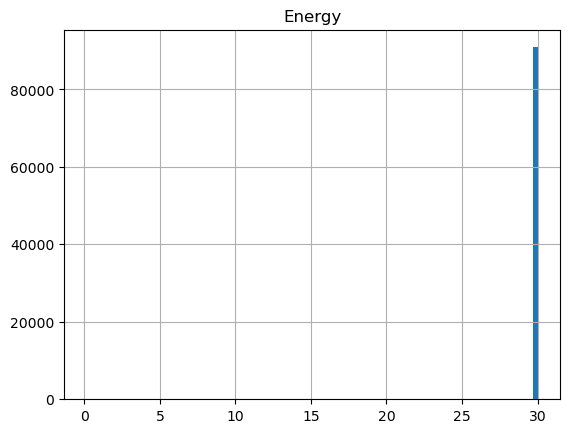

In [43]:
df.hist(column = "Energy", bins = 100)

In [4]:
folder_path = r'/home/argo/IMPISH/Data/xray_beam/'

def xray_tab_combiner(input_directory, output_file):
    headers = []
    rows = []

    #Iterates through all the files in the input directory
    for file_name in os.listdir(input_directory):
        if file_name.endswith('.tab'):
            file_path = os.path.join(input_directory, file_name)

            with open(file_path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                if lines:
                    #Will store the header from the first file
                    if not headers:
                        headers = lines[0].strip().split('\t')
                        rows.append('\t'.join(headers))
                    #Skips the lines in subsequent files (Change to 0 if your files dont have a header)
                    data_lines = lines[0:]
                    rows.extend(data_lines)

    #Writes all rows to an output file
    with open(output_file, 'w', encoding = 'utf-8') as output:
        output.writelines(rows)



In [6]:
xray_tab_combiner(folder_path, 'xrays_combined.tab')

In [7]:
f = open("/home/argo/IMPISH/Data/xray_beam/xrays_combined.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0         6.00000 -1.0
1         6.00000 -1.0
2         6.00000 -1.0
3         6.00000 -1.0
4         6.00000 -1.0
...           ...  ...
1144566   2.74751 -1.0
1144567  26.00000 -1.0
1144568  26.00000 -1.0
1144569  26.00000 -1.0
1144570  26.00000 -1.0

[1144571 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

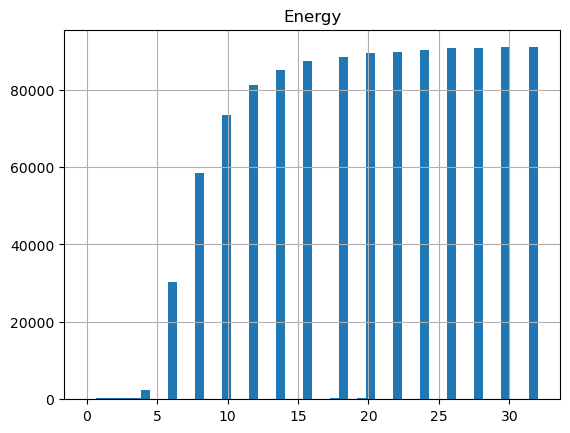

In [9]:
df.hist(column = "Energy", bins = 50)

In [11]:
def find_and_combine_tab_files(root_directory, file_name, output_file):
    headers = []
    rows = []
    header_written = False

    for dirpath, dirnames, filenames in os.walk(root_directory):
        if file_name in filenames:
            file_path = os.path.join(dirpath, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                if lines:
                    if not header_written:
                        headers = lines[0].strip()
                        rows.append(headers)
                        header_written = True
                    rows.extend(lines[0:])
    
    with open(output_file, 'w', encoding='utf-8') as output:
        output.writelines(rows)

In [12]:
root_directory = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/'
file_name = 'cryst-out.tab'
output_file = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/xray-energies.tab'

find_and_combine_tab_files(root_directory, file_name, output_file)

In [13]:
xray_tab_combiner(r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/', 'total-xray.tab')

In [15]:
f = open("/home/argo/IMPISH/Data/xray_beam/xray_beam_run/total-xray.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0        40.00000 -1.0
1        40.00000 -1.0
2        40.00000 -1.0
3        40.00000 -1.0
4        40.00000 -1.0
...           ...  ...
2709209   2.74751 -1.0
2709210  26.00000 -1.0
2709211  26.00000 -1.0
2709212  26.00000 -1.0
2709213  26.00000 -1.0

[2709214 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

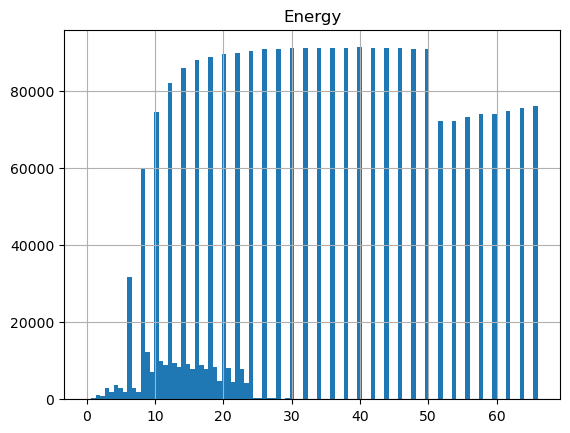

In [16]:
df.hist(column = "Energy", bins = 100, )

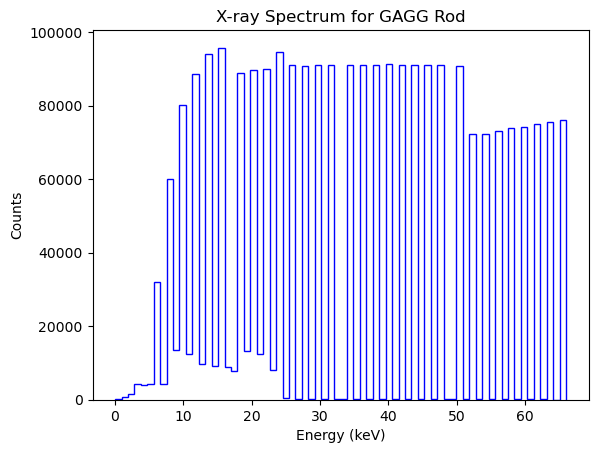

In [20]:
plt.hist(df['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('X-ray Spectrum for GAGG Rod')

plt.show()

In [5]:
lfthick05 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.05thick-run1-2024-06-18-15:19:47/cryst-out.tab", "r")
ldata05 = lfthick05.read()
#print (data)

ldata05 = ldata05.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata05 = ldata05.replace(",", ", ") #Adds in space for the data
ldat05 = np.loadtxt(StringIO(ldata05), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf05 = pd.DataFrame(data = ldat05, columns = hist_values)
print(ldf05)


#Using .1 reflector thickness
lfthick1 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.1thick-run1-2024-06-18-15:16:09/cryst-out.tab", "r")
ldata1 = lfthick1.read()
#print (data)

ldata1 = ldata1.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata1 = ldata1.replace(",", ", ") #Adds in space for the data
ldat1 = np.loadtxt(StringIO(ldata05), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf1 = pd.DataFrame(data = ldat1, columns = hist_values)
print(ldf1)


#Using .5 reflector thickness
lfthick5 = open("/home/argo/IMPISH/Data/LYSO_1SP/lyso-1sp-.5thick-run1-2024-06-18-15:18:43/cryst-out.tab", "r")
ldata5 = lfthick5.read()
#print (data)

ldata5 = ldata5.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
ldata5 = ldata5.replace(",", ", ") #Adds in space for the data
ldat5 = np.loadtxt(StringIO(ldata5), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

ldf5 = pd.DataFrame(data = ldat5, columns = hist_values)
print(ldf5)

         Energy    y
0      223.1320 -1.0
1      111.6200 -1.0
2       30.9789 -1.0
3      151.7060 -1.0
4       30.9789 -1.0
...         ...  ...
85316   30.9789 -1.0
85317  111.9770 -1.0
85318  356.0130 -1.0
85319   80.9979 -1.0
85320   80.9979 -1.0

[85321 rows x 2 columns]
         Energy    y
0      223.1320 -1.0
1      111.6200 -1.0
2       30.9789 -1.0
3      151.7060 -1.0
4       30.9789 -1.0
...         ...  ...
85316   30.9789 -1.0
85317  111.9770 -1.0
85318  356.0130 -1.0
85319   80.9979 -1.0
85320   80.9979 -1.0

[85321 rows x 2 columns]
         Energy    y
0      223.1320 -1.0
1      111.6200 -1.0
2       30.9789 -1.0
3      151.7060 -1.0
4      356.0130 -1.0
...         ...  ...
79751   30.9789 -1.0
79752   30.6218 -1.0
79753   30.9789 -1.0
79754   61.2436 -1.0
79755  383.8490 -1.0

[79756 rows x 2 columns]


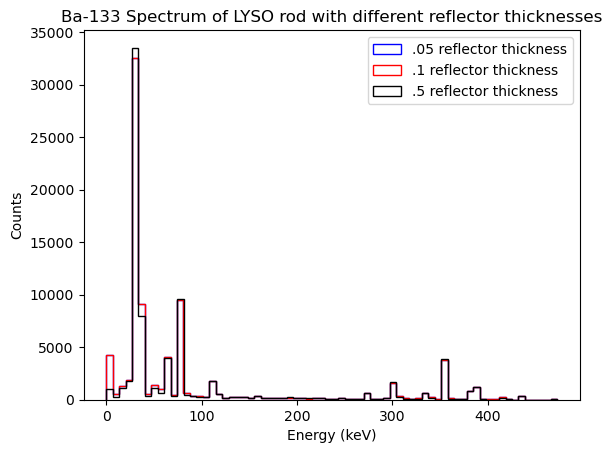

In [10]:
plt.hist(ldf05['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue', label = '.05 reflector thickness')
plt.hist(ldf1['Energy'], bins = 70, histtype = 'step', edgecolor = 'red', label = '.1 reflector thickness')
plt.hist(ldf5['Energy'], bins = 70, histtype = 'step', edgecolor = 'black', label = '.5 reflector thickness')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.title('Ba-133 Spectrum of LYSO rod with different reflector thicknesses')

plt.show()

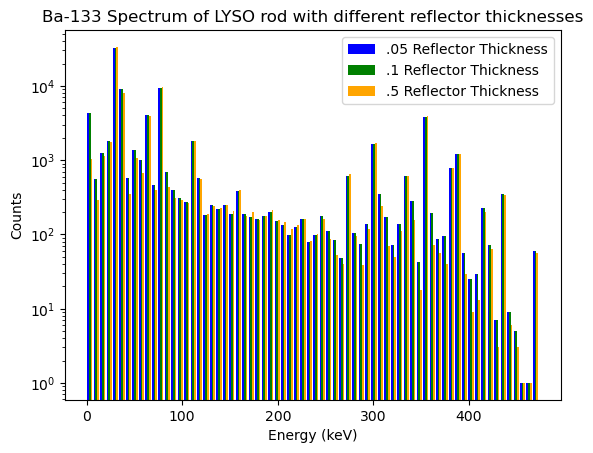

In [14]:
x1 = ldf05['Energy']
x2 = ldf1['Energy']
x3 = ldf5['Energy']

colors = ['blue', 'green', 'orange']
names = ['.05 Reflector Thickness', '.1 Reflector Thickness', '.5 Reflector Thickness']

plt.hist([x1, x2, x3], bins = 70, color = colors, label = names)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.title('Ba-133 Spectrum of LYSO rod with different reflector thicknesses')

plt.show()

## Do some thicknesses between .1 and .5. Might be able to see something else. .1 and .05 did not really give much of a difference, .1 gave more detections at the lowest energies so maybe rerun and see if that occurs again.

# Comparison between LYSO and GAGG ESR ASP Rod Ba-133 Spectrum

In [16]:
def crystal_data(crystal, path):

    x = str(path)
    c = str(crystal)
    c + f = open("/home/argo/IMPISH/Data/xray_beam/" + x + "/cryst-out.tab", "r")
    c+data = c+f.read()
    #print (data)
    
    c+data = c+data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
    c+data = c+data.replace(",", ", ") #Adds in space for the data
    c+dat = np.loadtxt(StringIO(c+data), dtype=float, delimiter=",")
    #print(dat.shape)
    #print(dat)
    
    hist_values = ["Energy", "y"]
    
    c+df = pd.DataFrame(data = c+dat, columns = hist_values)
    print(c+df)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (2104304458.py, line 5)